<a href="https://colab.research.google.com/github/Shubhu2603/DeepLearning/blob/main/MP%20neuron%20and%20Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

In [661]:
import sklearn.datasets

In [662]:
import numpy as np

In [663]:
breast_cancer=sklearn.datasets.load_breast_cancer()

In [664]:
X= breast_cancer.data
Y= breast_cancer.target

In [665]:
print(X,Y
)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [666]:
print(X.shape,Y.shape)

(569, 30) (569,)


In [667]:
import pandas as pd

In [668]:
data=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [669]:
data['class']=breast_cancer.target

In [670]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [671]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [672]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [673]:
print(breast_cancer.target_names )

['malignant' 'benign']


In [674]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Train Test Split

In [675]:
from sklearn.model_selection import train_test_split

In [676]:
X=data.drop('class',axis=1)
Y=data['class']

In [677]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [678]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (512, 30) (57, 30)


In [679]:
print(Y.mean(),Y_train.mean(),Y_test.mean() )

0.6274165202108963 0.626953125 0.631578947368421


# Binarization of Input

In [680]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

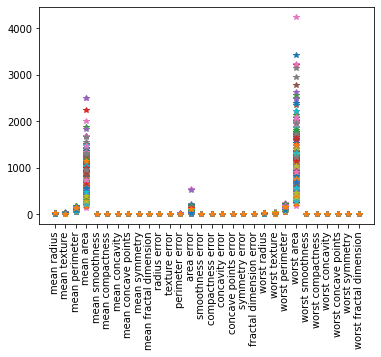

In [681]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [682]:
X_Binarised_3_train=X_train['mean area'].map(lambda x: 0 if x<1000 else 1)

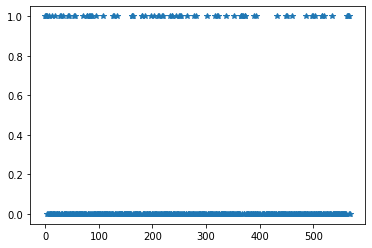

In [683]:
plt.plot(X_Binarised_3_train,'*')

In [684]:
X_binarised_test=X_test.apply(pd.cut,bins=2,labels=[1,0])

In [685]:
X_binarised_train=X_train.apply(pd.cut,bins=2,labels=[1,0])

In [686]:
X_binarised_test=X_binarised_test.values
X_binarised_train=X_binarised_train.values

In [687]:
b=3

Y_pred_train=[]
accurate_rows=0

for x,y in zip(X_binarised_train, Y_train):
  Y_pred=(np.sum(x)>=b)
  Y_pred_train.append(Y_pred)
  accurate_rows+=(y==Y_pred)

print(accurate_rows,accurate_rows/X_binarised_train.shape[0])



321 0.626953125


In [688]:
for b in range(X_binarised_train.shape[1]+1):
  Y_pred_train=[]
  accurate_rows=0
  for x,y in zip(X_binarised_train, Y_train):
    Y_pred=(np.sum(x)>=b)
    Y_pred_train.append(Y_pred)
    accurate_rows+=(y==Y_pred)
  print(b,accurate_rows/X_binarised_train.shape[0])

0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


In [689]:
b=28
y_pred_test=[]

for x in X_binarised_test:
  y_pred=(np.sum(x)>=b)
  y_pred_test.append(y_pred)

accuracy=accuracy_score(y_pred_test,Y_test)
print(b,accuracy*100,"%")

28 78.94736842105263 %


# MP Neuron Class

In [690]:
class MPNeuron:

  def __init__(self):
      self.b=None
  

  def model(self,x):
    return (sum(x)>=self.b)
  
  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self,X,Y):
    accuracy={}

    for b in range(X.shape[1]+1):
      self.b=b
      Y_pred=self.predict(X)
      accuracy[b]=accuracy_score(Y_pred,Y)
    
    best_b=max(accuracy,key=accuracy.get)
    self.b=best_b

    print("Optimal value of b is", best_b)
    print("Highest accuracy is", accuracy[best_b])

In [691]:
mpneuron=MPNeuron()
mpneuron.fit(X_binarised_train,Y_train)

Optimal value of b is 28
Highest accuracy is 0.849609375


In [692]:
Y_test_pred=mpneuron.predict(X_binarised_test)
accuracy_test=accuracy_score(Y_test_pred,Y_test)

In [693]:
print(accuracy_test)

0.7894736842105263


#Perceptron Class


$y=1, \mbox{if} \sum_i  w_i x_i >=b$

$y=0, \mbox{otherwise}$

In [694]:
import numpy as np
class Perceptron:

  def __init__(self):
    self.w=None
    self.b=None

  def model(self,x):
    return 1 if  (np.dot(self.w,x)>=self.b) else 0

  def predict(self,X):
    Y=[]
    for x in X:
      result=self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epochs=1,lr=1):
    self.w=np.ones(X.shape[1])
    self.b=0

    accuracy={}
    max_accuracy=0

    wt_matrix=[]

    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred=self.model(x)
        if y==1 and y_pred==0:
          self.w=self.w+lr*x
          self.b=self.b=lr*1
        elif y==0 and y_pred==1:
          self.w=self.w-lr*x
          self.b=self.b-lr*1

      wt_matrix.append(self.w)
      accuracy[i]=accuracy_score(self.predict(X),Y)
      if(accuracy[i]>max_accuracy):
        max_accuracy=accuracy[i]
        chkptw=self.w
        chkptb=self.b
    
    self.w=chkptw
    self.b=chkptb

    print(max_accuracy)
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.ylim([0,1])
    plt.show()
    
    return np.array(wt_matrix)

In [695]:
perceptron=Perceptron()

In [696]:
X_train=X_train.values
X_test=X_test.values

0.92578125


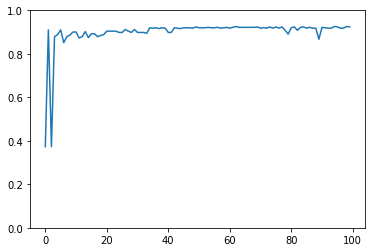

In [697]:
wt_matrix=perceptron.fit(X_train,Y_train,100)

In [698]:
Y_pred_train=perceptron.predict(X_train)
print(accuracy_score(Y_pred_train,Y_train))

0.92578125


In [699]:
y_pred_test=perceptron.predict(X_test)
print(accuracy_score(y_pred_test,Y_test))

0.9473684210526315


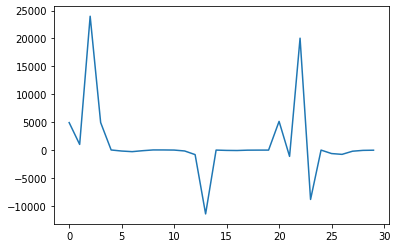

In [700]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [701]:
%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

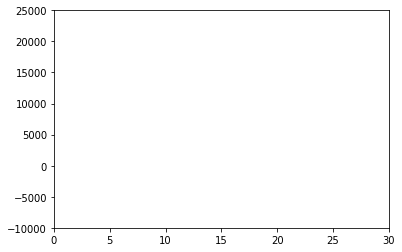

In [702]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-10000, 25000))

line, = ax.plot([], [], lw=2)

In [710]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)

In [711]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=100, interval=200, blit=True)

In [712]:
HTML(anim.to_html5_video())